# Load data

In [202]:
from pandas import DataFrame, read_csv

def load_data(
        data_file: str,
        n_rows: int | None = None,
) -> DataFrame:
    return read_csv(data_file, index_col='row_index', nrows=n_rows)

In [203]:
import pandas as pd

# train_data = file_manager.load_training_data()

# TODO
train_file = 'X_train.csv'
test_file = 'X_test.csv'
n_rows = 100_000

test_data = load_data(test_file)
tiny_train_data = load_data(train_file, n_rows=n_rows)
# train_data = load_data(train_file)

C:\Users\serra\AppData\Local\Temp\ipykernel_23472\3843374924.py:7: DtypeWarning: Columns (108,110,111,115,117,118,122,124,125,130,133,134) have mixed types. Specify dtype option on import or set low_memory=False.
  return read_csv(data_file, index_col='row_index', nrows=n_rows)
C:\Users\serra\AppData\Local\Temp\ipykernel_23472\3843374924.py:7: DtypeWarning: Columns (108,110,111,115,117,118,122,124,125,130,133,134) have mixed types. Specify dtype option on import or set low_memory=False.
  return read_csv(data_file, index_col='row_index', nrows=n_rows)


# Split raw data by variable category (piezo, weather, ...)

We are only interested in training data.

In [204]:
from pandas import DataFrame

# Function to extract variable category
def extract_category(
        df: DataFrame,
        category: str,
) -> DataFrame:
    return df[df.columns[df.columns.str.startswith(category)]]

In [205]:
# Example with meteo variables
meteo_variables = extract_category(tiny_train_data, 'meteo')
meteo_variables.head()

,meteo_id,meteo_name,meteo_latitude,meteo_longitude,meteo_altitude,meteo_date,meteo_rain_height,meteo_DRR,meteo_temperature_min,meteo_time_tn,...,meteo_if_frost,meteo_if_smoke,meteo_if_mist,meteo_if_lightning,meteo_evapotranspiration_Monteith,meteo_evapotranspiration_grid,meteo_radiation_UV,meteo_snow_height,meteo_snow_thickness_max,meteo_snow_thickness_6h
row_index,,,,,,,,,,,,,,,,,,,,,
39,2705001,NIZY-LE-COMTE,4.036500,49.566000,90,2020-01-01,0.2,NaN,-1.2,1845.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
62,3130002,ISLE-ET-BARDAIS,2.730167,46.663333,262,2020-01-01,0.8,NaN,-1.9,2357.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
148,9199002,MONTAUT,1.643500,43.192167,295,2020-01-01,0.2,NaN,6.2,1900.0,...,NaN,NaN,NaN,NaN,1.2,1.2,NaN,NaN,NaN,NaN
177,34269001,ST JEAN DE MINERVOIS,2.857667,43.385667,258,2020-01-01,0.2,NaN,1.2,552.0,...,NaN,NaN,NaN,NaN,NaN,0.9,NaN,NaN,NaN,NaN
179,11203004,LEZIGNAN-CORBIERES,2.728833,43.173000,60,2020-01-01,0.0,NaN,7.0,438.0,...,NaN,NaN,NaN,NaN,NaN,1.9,NaN,NaN,NaN,NaN


# Weather Information

## 1. Numerical values

In [206]:
# listing all numerical values except price to have only the features
numerical_meteo = meteo_variables.select_dtypes(include=['float64', 'int64']).columns
categorical_meteo = meteo_variables.select_dtypes(include=['object']).columns

### 1.1. Introductory visualization

In [207]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_matrix(dataframe, numerical_columns, figsize=(12, 10)):
    correlation_matrix = dataframe[numerical_columns].corr()
    plt.figure(figsize=figsize)
    sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Correlation Matrix")
    plt.show()
    return correlation_matrix

In [208]:
import numpy as np

def get_sorted_correlation_pairs(correlation_matrix):
    """
    Converts a correlation matrix into a sorted list of feature pairs based on correlation values.
    
    Parameters:
    - correlation_matrix: pandas.DataFrame, the correlation matrix to process.
    
    Returns:
    - pandas.DataFrame: A DataFrame containing sorted correlation pairs with absolute correlation values.
    """
    # Remove the lower triangle and diagonal
    correlation_matrix = correlation_matrix.where(
        ~np.tril(np.ones(correlation_matrix.shape)).astype(bool)
    )

    # Convert to long format
    correlation_pairs = correlation_matrix.stack().reset_index()
    correlation_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation Score']
    correlation_pairs['Absolute Correlation'] = np.abs(correlation_pairs['Correlation Score'])

    # Sort by absolute correlation value
    sorted_correlation_pairs = correlation_pairs.sort_values(by='Absolute Correlation', ascending=False)

    return sorted_correlation_pairs

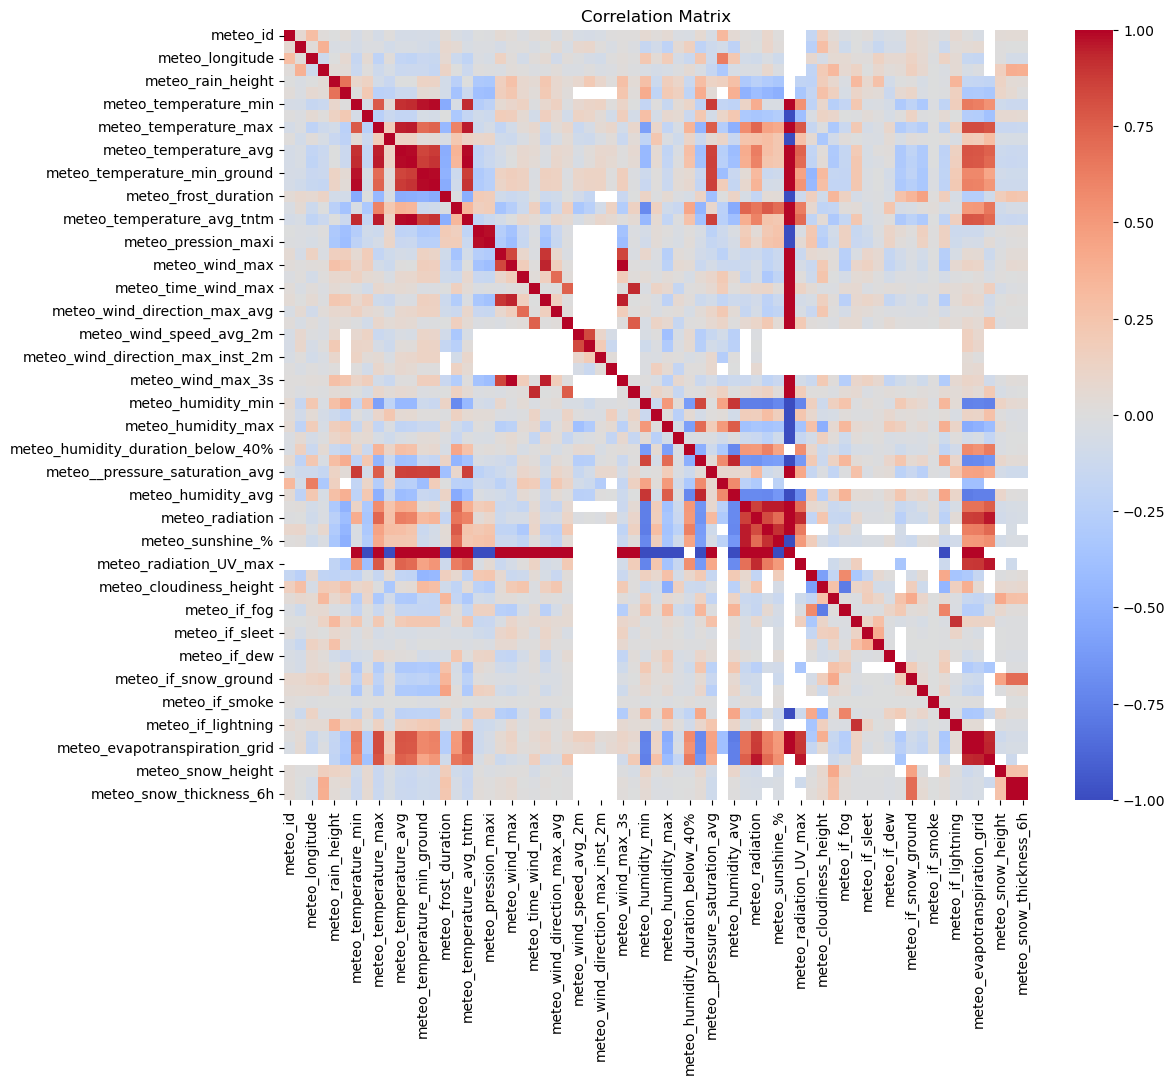

In [209]:
correlation_matrix = plot_correlation_matrix(meteo_variables, numerical_meteo)

In [210]:
print(get_sorted_correlation_pairs(correlation_matrix))

                              Feature 1                          Feature 2  \
988                  meteo_pressure_avg                 meteo_radiation_IR   
893               meteo_amplitude_tn_tx                 meteo_radiation_IR   
1117                     meteo_wind_max                 meteo_radiation_IR   
1790                 meteo_radiation_IR  meteo_evapotranspiration_Monteith   
685     meteo_temperature_avg_threshold                 meteo_radiation_IR   
...                                 ...                                ...   
1179      meteo_wind_direction_max_inst            meteo_snow_thickness_6h   
1383             meteo_time_wind_max_2m                 meteo_humidity_avg   
1180                meteo_time_wind_max                     meteo_wind_avg   
587                       meteo_time_tx                     meteo_if_smoke   
1615  meteo_humidity_duration_below_40%           meteo_snow_thickness_max   

      Correlation Score  Absolute Correlation  
988           -

### 1.2. Dealing with missing values

In [211]:
# List of columns to check for missing values
columns_to_check = [
    "meteo_if_thunderstorm",
    "meteo_if_lightning",
    "meteo_temperature_avg_threshold",
    "meteo_temperature_avg_tntm",
    "meteo_snow_thickness_max",
    "meteo_snow_thickness_6h",
    "meteo_sunshine_duration",
    "meteo_sunshine_%",
    "meteo_wind_max",
    "meteo_wind_max_3s",
    "meteo_pressure_avg",
    "meteo_radiation_IR",
    "meteo_amplitude_tn_tx",
    "meteo_wind_max",
    "meteo_evapotranspiration_Monteith"
]

# Calculate the number of missing values for each column
missing_values = meteo_variables[columns_to_check].isna().sum()

# Display the missing values
print("Number of missing values for each column:")
print(missing_values)

Number of missing values for each column:
meteo_if_thunderstorm                89652
meteo_if_lightning                   97553
meteo_temperature_avg_threshold       8602
meteo_temperature_avg_tntm            8602
meteo_snow_thickness_max             83972
meteo_snow_thickness_6h              84202
meteo_sunshine_duration              86958
meteo_sunshine_%                     86958
meteo_wind_max                       53788
meteo_wind_max_3s                    57471
meteo_pressure_avg                   85174
meteo_radiation_IR                   99998
meteo_amplitude_tn_tx                 8602
meteo_wind_max                       53788
meteo_evapotranspiration_Monteith    82645
dtype: int64


In [212]:
# displaying which numerical columns have missing values
meteo_variables[numerical_meteo].isna().sum(axis=0)

meteo_id                             0
meteo_latitude                       0
meteo_longitude                      0
meteo_altitude                       0
meteo_rain_height                  925
                                 ...  
meteo_evapotranspiration_grid    11637
meteo_radiation_UV               99786
meteo_snow_height                93910
meteo_snow_thickness_max         83972
meteo_snow_thickness_6h          84202
Length: 67, dtype: int64

In [213]:
# displaying the numerical columns that have missing values
missing_values = meteo_variables[numerical_meteo].isna().sum(axis=0)
print(missing_values[missing_values > 0])

meteo_rain_height                  925
meteo_DRR                        88179
meteo_temperature_min             8599
meteo_time_tn                    12092
meteo_temperature_max             8473
                                 ...  
meteo_evapotranspiration_grid    11637
meteo_radiation_UV               99786
meteo_snow_height                93910
meteo_snow_thickness_max         83972
meteo_snow_thickness_6h          84202
Length: 63, dtype: int64


In [214]:
# displaying the number of rows in the dataframe
print(f"Number of rows in meteo_variables: {meteo_variables.shape[0]}")

Number of rows in meteo_variables: 100000


In [215]:
# filtering and displaying columns based on the number of missing values
print("Columns with more than 90000 missing values:")
print(missing_values[missing_values > 90000])

Columns with more than 90000 missing values:
meteo_wind_speed_avg_2m             95660
meteo_wind_max_2m                   95662
meteo_wind_direction_max_inst_2m    95764
meteo_time_wind_max_2m              95759
meteo_wetting_duration              99718
meteo_radiation_direct              99715
meteo_radiation_IR                  99998
meteo_radiation_UV_max              99786
meteo_cloudiness                    99717
meteo_cloudiness_height             99717
meteo_if_sleet                      97553
meteo_if_hail                       97567
meteo_if_dew                        97515
meteo_if_black_ice                  94385
meteo_if_snow_ground                97510
meteo_if_frost                      91984
meteo_if_lightning                  97553
meteo_radiation_UV                  99786
meteo_snow_height                   93910
dtype: int64


In [216]:
print("Columns with missing values between 60000 and 90000:")
print(missing_values[(missing_values > 60000) & (missing_values <= 90000)])

Columns with missing values between 60000 and 90000:
meteo_DRR                            88179
meteo_temperature_min_ground         73295
meteo_temperature_min_50cm           84072
meteo_pressure_avg                   85174
meteo_pression_maxi                  85320
meteo_sunshine_duration              86958
meteo_radiation                      82582
meteo_sunshine_%                     86958
meteo_if_snow                        86454
meteo_if_fog                         86758
meteo_if_thunderstorm                89652
meteo_if_smoke                       87335
meteo_if_mist                        87079
meteo_evapotranspiration_Monteith    82645
meteo_snow_thickness_max             83972
meteo_snow_thickness_6h              84202
dtype: int64


In [217]:
print("Columns with missing values between 45000 and 60000:")
print(missing_values[(missing_values > 45000) & (missing_values <= 60000)])

Columns with missing values between 45000 and 60000:
meteo_wind_speed_avg_10m             53800
meteo_wind_max                       53788
meteo_wind_direction_max_inst        53894
meteo_time_wind_max                  53918
meteo_wind_avg                       53937
meteo_wind_direction_max_avg         53981
meteo_time_wind_avg                  53955
meteo_wind_max_3s                    57471
meteo_time_wind_max_3s               57473
meteo_humidity_min                   48901
meteo_time_humidity_min              49024
meteo_humidity_max                   48905
meteo_time_humidity_max              49022
meteo_humidity_duration_below_40%    49313
meteo_humidity_duration_above_80%    49356
meteo__pressure_saturation_avg       48880
meteo_humidity_avg                   48884
dtype: int64


In [218]:
print("Columns with missing values between 20000 and 45000:")
print(missing_values[(missing_values > 20000) & (missing_values <= 45000)])

Columns with missing values between 20000 and 45000:
Series([], dtype: int64)


In [219]:
print("Columns with missing values between 5000 and 20000:")
print(missing_values[(missing_values > 5000) & (missing_values <= 20000)])

Columns with missing values between 5000 and 20000:
meteo_temperature_min               8599
meteo_time_tn                      12092
meteo_temperature_max               8473
meteo_time_tx                      12081
meteo_temperature_avg              11787
meteo_temperature_avg_threshold     8602
meteo_frost_duration               16952
meteo_amplitude_tn_tx               8602
meteo_temperature_avg_tntm          8602
meteo_evapotranspiration_grid      11637
dtype: int64


In [220]:
print("Columns with missing values between 1 and 5000:")
print(missing_values[(missing_values > 0) & (missing_values <= 5000)])

Columns with missing values between 1 and 5000:
meteo_rain_height    925
dtype: int64


#### 1.1.1. High numbers of missing values

In [221]:
# columns to exclude are those with more than 60 000 NaN
high_NaN_columns = [
    "meteo_radiation_IR",
    "meteo_radiation_UV_max",
    "meteo_wetting_duration",
    "meteo_radiation_direct",
    "meteo_cloudiness",
    "meteo_cloudiness_height",
    "meteo_radiation_UV",
    "meteo_if_sleet",
    "meteo_if_hail",
    "meteo_if_lightning",
    "meteo_if_dew",
    "meteo_if_snow_ground",
    "meteo_if_black_ice",
    "meteo_snow_height",
    "meteo_if_frost",
    "meteo_DRR",
    "meteo_if_smoke",
    "meteo_if_mist",
    "meteo_if_fog",
    "meteo_if_snow",
    "meteo_sunshine_duration",
    "meteo_sunshine_%",
    "meteo_radiation",
    "meteo_evapotranspiration_Monteith",
    "meteo_temperature_min_ground",
    "meteo_temperature_min_50cm",
    "meteo_time_wind_max_2m",
    "meteo_wind_direction_max_inst_2m",
    "meteo_wind_speed_avg_2m",
    "meteo_wind_max_2m",
    "meteo_pression_maxi",
    "meteo_pressure_avg",
    "meteo_snow_thickness_max",
    "meteo_snow_thickness_6h",
    "meteo_if_thunderstorm"
]

# Create the new DataFrame excluding the specified columns
#filtered_df = meteo_variables[numerical_meteo].drop(columns=high_NaN_columns, errors='ignore')

meteo_variables = meteo_variables.drop(columns=high_NaN_columns, errors='ignore')

#### 1.1.2. Low numbers of missing values

In [222]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_kde_for_column(dataframe, column_name):
    """
    Plots a KDE distribution for a specified column in a DataFrame.
    
    Parameters:
    - dataframe: pandas.DataFrame, the data source
    - column_name: str, the name of the column to plot
    """
    # Set up the figure
    plt.figure(figsize=(10, 5))

    # KDE plot for the specified column
    sns.kdeplot(data=dataframe, x=column_name, fill=True)
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Density')

    # Show the plot
    plt.tight_layout()
    plt.show()

In [223]:
# columns to work with are those with less than 20 000 NaN
low_NaN_columns = [
    "meteo_frost_duration",
    "meteo_evapotranspiration_grid",
    "meteo_temperature_avg",
    "meteo_time_tx",
    "meteo_time_tn",
    "meteo_temperature_avg_threshold",
    "meteo_temperature_avg_tntm",
    "meteo_amplitude_tn_tx",
    "meteo_temperature_max",
    "meteo_temperature_min",
    "meteo_rain_height"
]

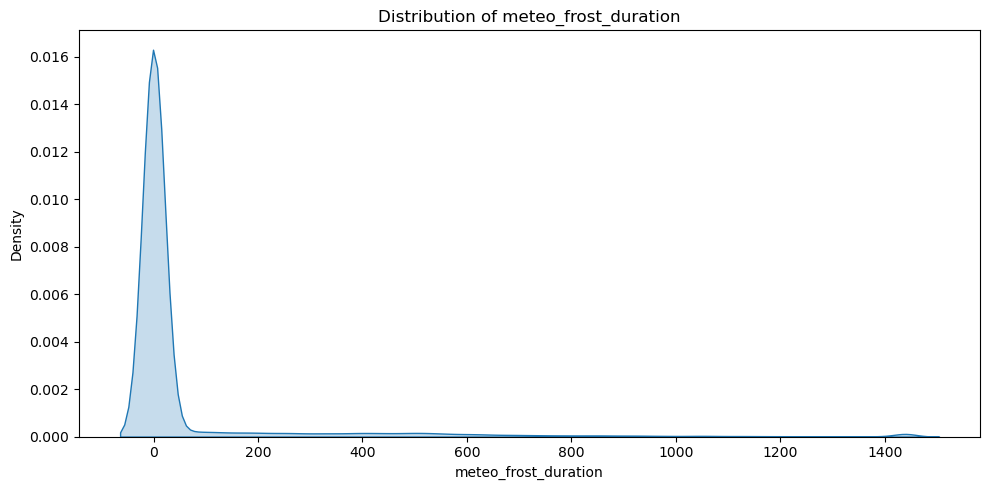

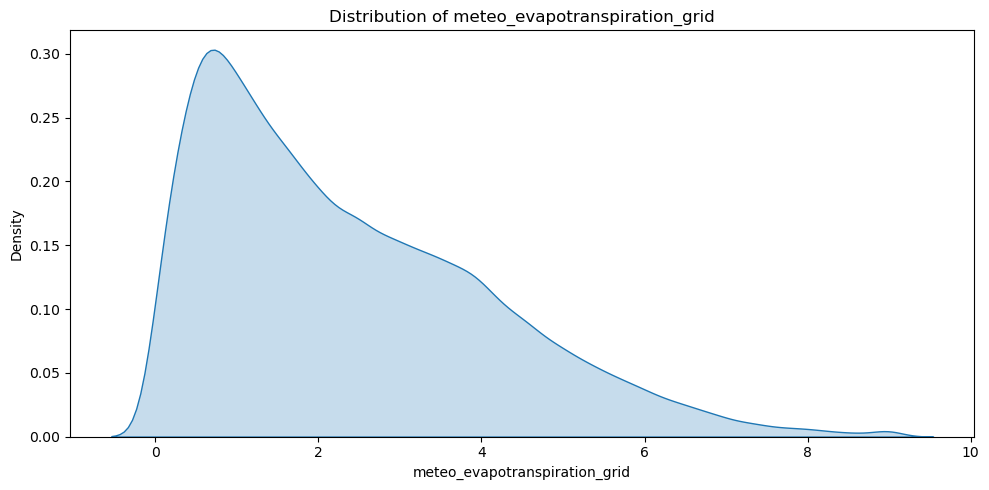

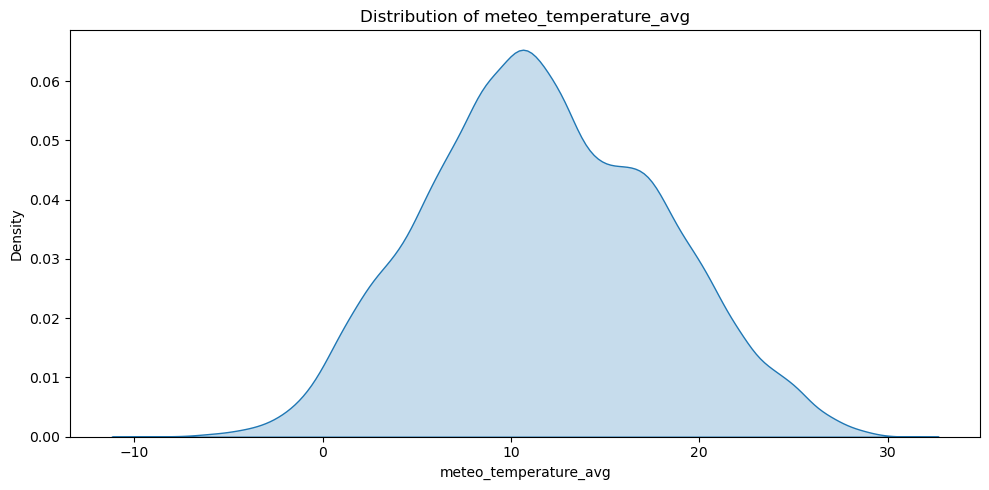

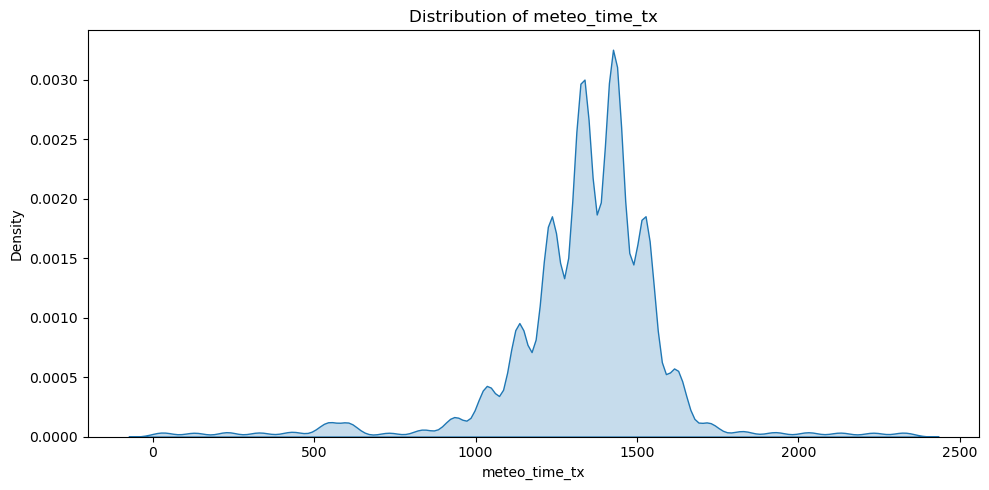

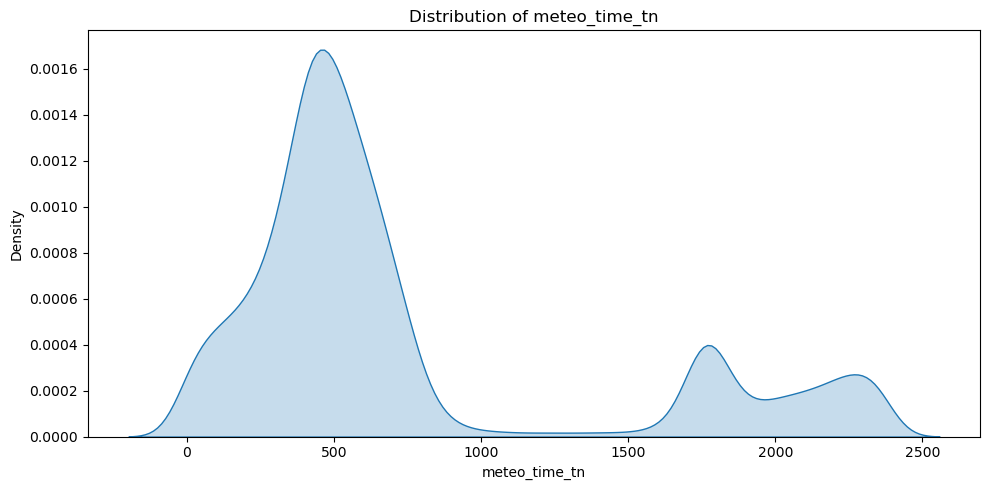

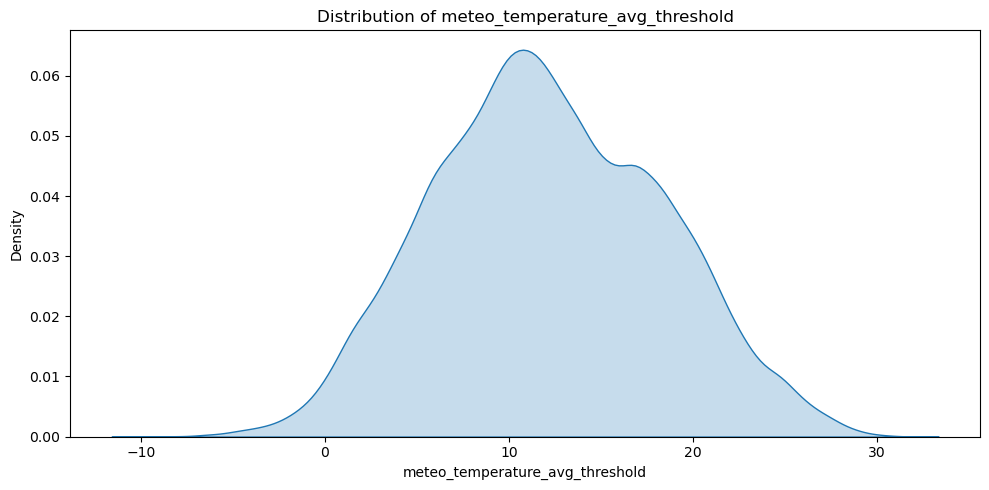

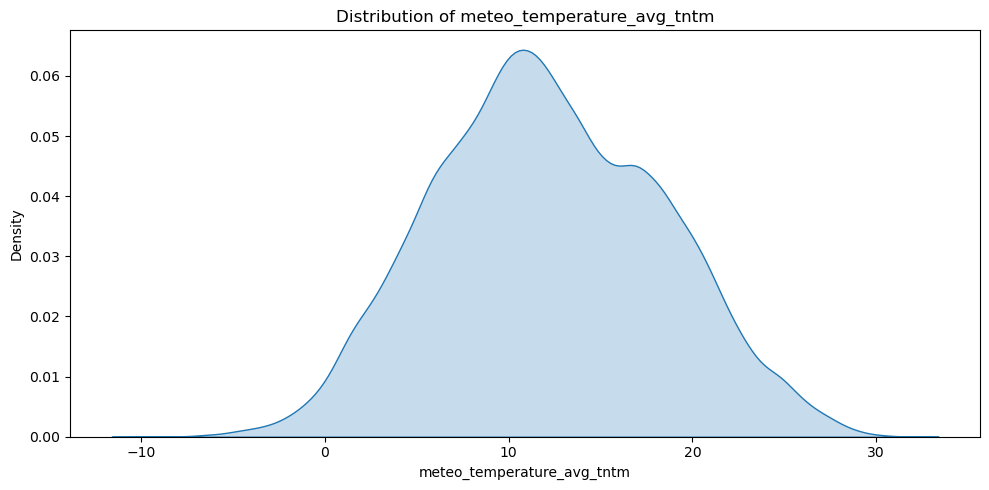

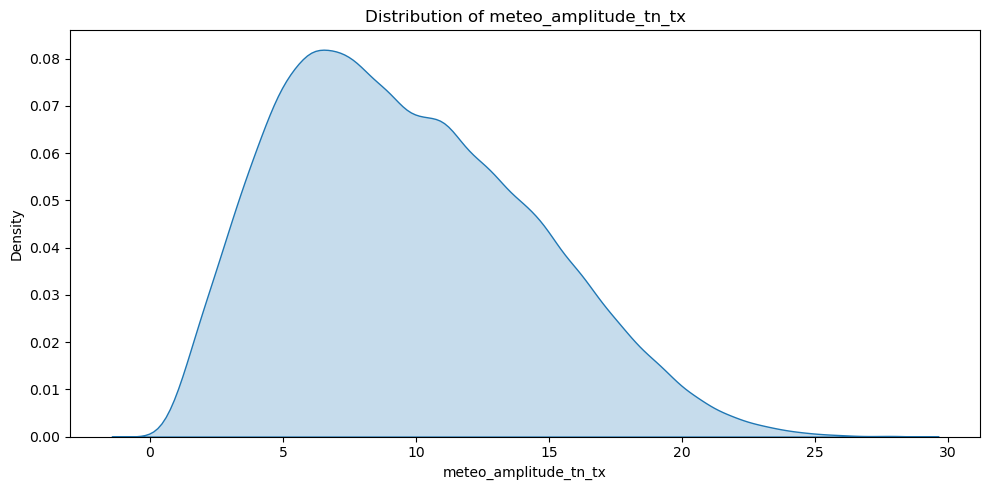

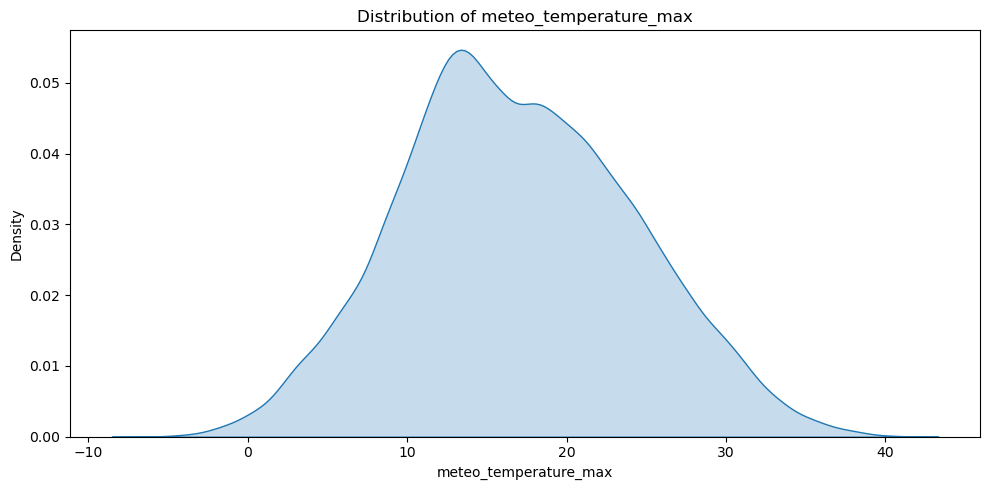

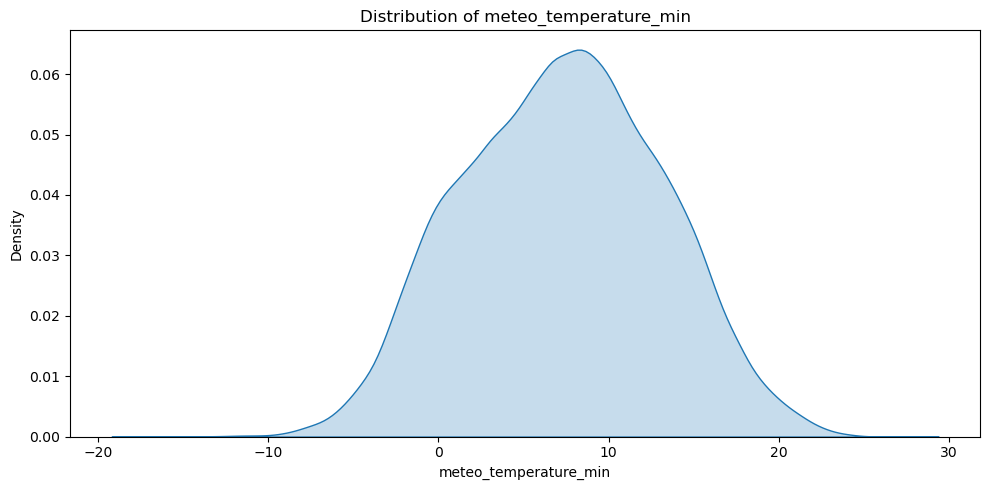

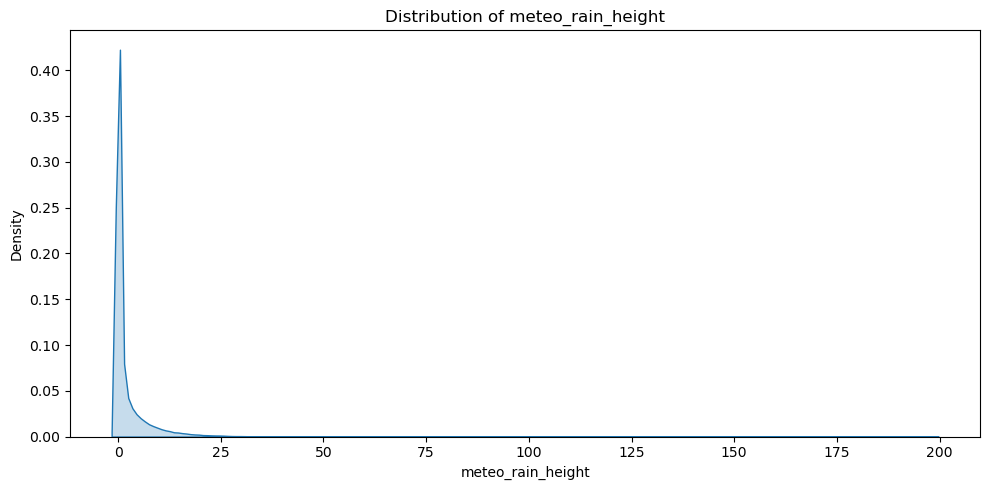

In [224]:
for column in low_NaN_columns:
    if column in meteo_variables.columns:
        plot_kde_for_column(meteo_variables, column)
    else:
        print(f"Column {column} not found in filtered_df")

In [225]:
meteo_variables = meteo_variables.drop(columns="meteo_time_tn", errors='ignore') # doesn't look like a Gaussian

In [226]:
# Replace NaN in 'meteo_time_tx' with the mean value
if "meteo_time_tx" in meteo_variables.columns:
    meteo_variables["meteo_time_tx"].fillna(meteo_variables["meteo_time_tx"].mean(), inplace=True)

# List of columns to replace NaN with the median value
median_columns = [
    "meteo_frost_duration",
    "meteo_evapotranspiration_grid",
    "meteo_temperature_avg",
    "meteo_temperature_avg_threshold",
    "meteo_temperature_avg_tntm",
    "meteo_amplitude_tn_tx",
    "meteo_temperature_max",
    "meteo_temperature_min",
    "meteo_rain_height"
]

# Replace NaN in specified columns with the median value
for column in median_columns:
    if column in meteo_variables.columns:
        meteo_variables[column].fillna(meteo_variables[column].median(), inplace=True)

#### 1.1.3. Medium numbers of missing values

In [227]:
def plot_histogram(dataframe, column_name):
    # Histogram
    plt.figure(figsize=(8, 4))
    dataframe[column_name].plot(kind='hist', bins=30)
    plt.title("Histogram")
    plt.show()

In [228]:
medium_NaN_columns = [
    "meteo_wind_direction_max_avg", 
    "meteo_time_wind_avg",
    "meteo_wind_avg",
    "meteo_time_wind_max",
    "meteo_wind_direction_max_inst",
    "meteo_wind_speed_avg_10m",
    "meteo_wind_max",
    "meteo_time_wind_max_3s",
    "meteo_wind_max_3s",
    "meteo_humidity_duration_above_80%",
    "meteo_humidity_duration_below_40%",
    "meteo_time_humidity_max",
    "meteo_humidity_max",
    "meteo_time_humidity_min",
    "meteo_humidity_min",
    "meteo_humidity_avg",
    "meteo__pressure_saturation_avg" 
]

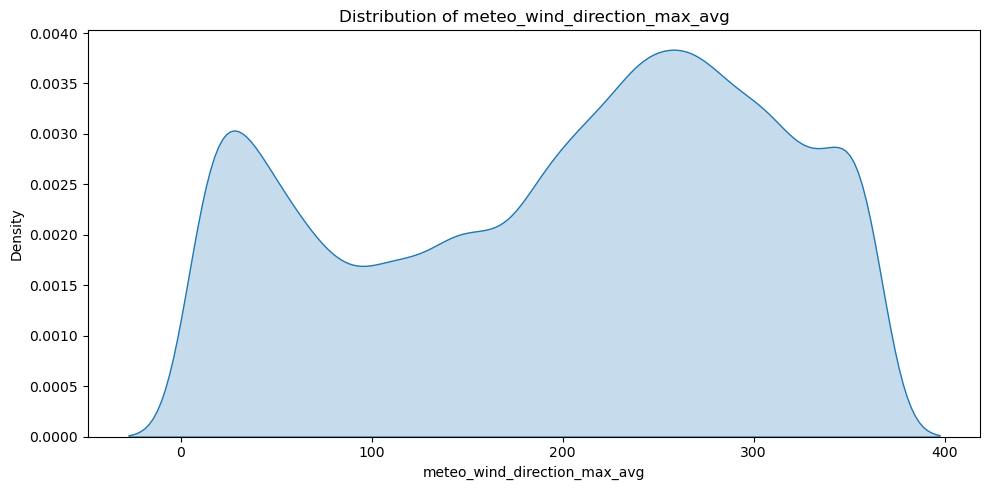

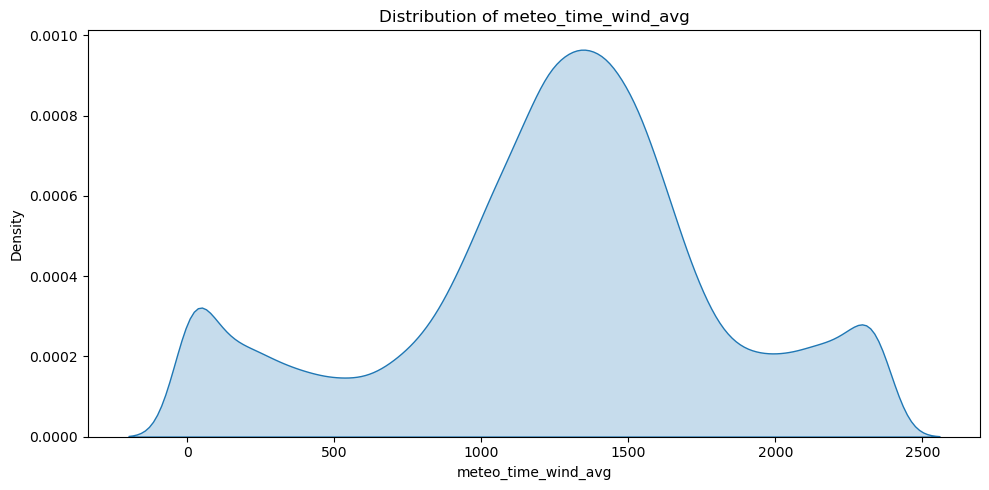

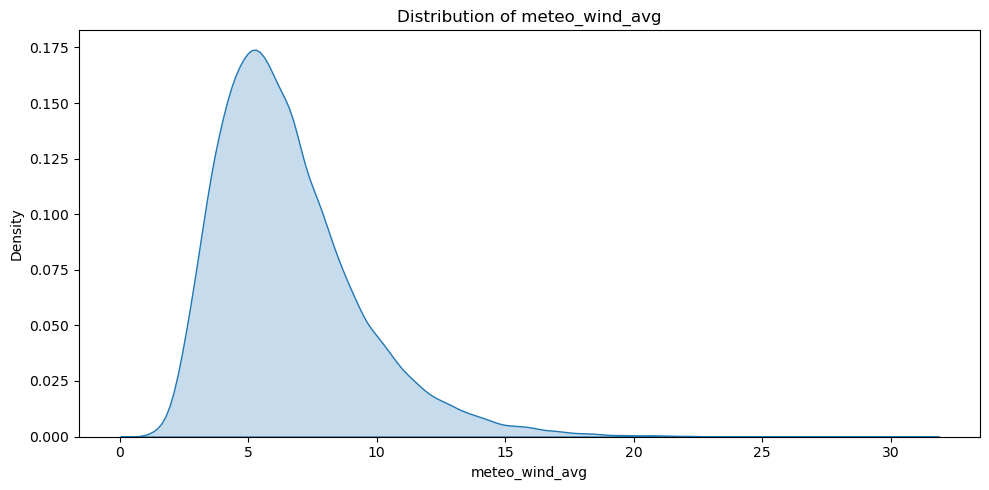

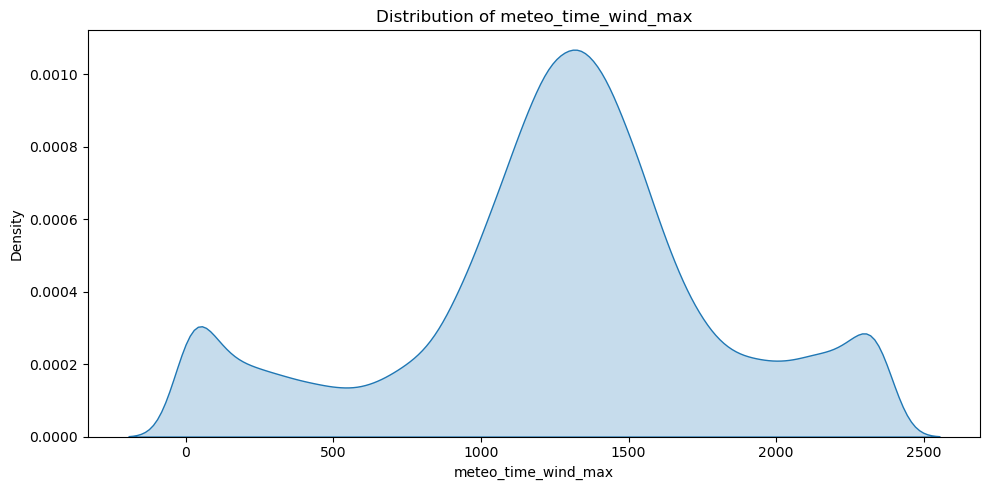

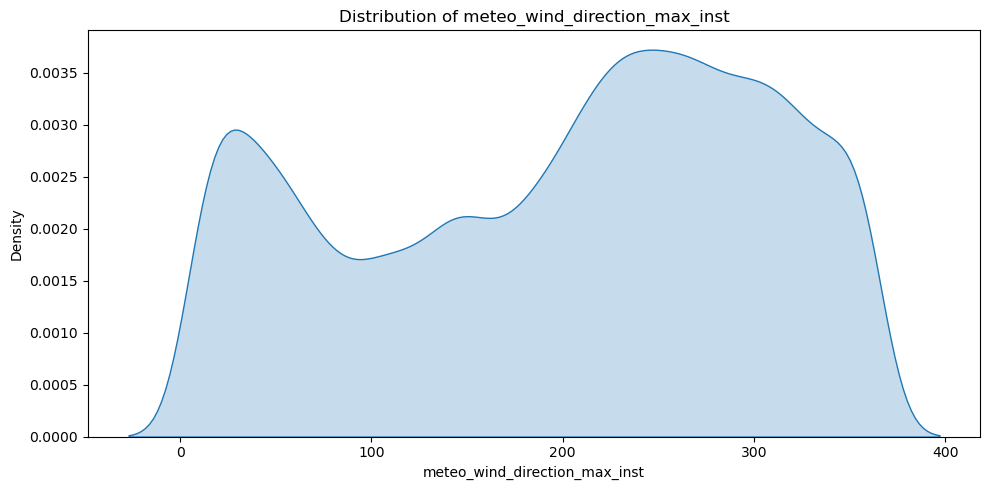

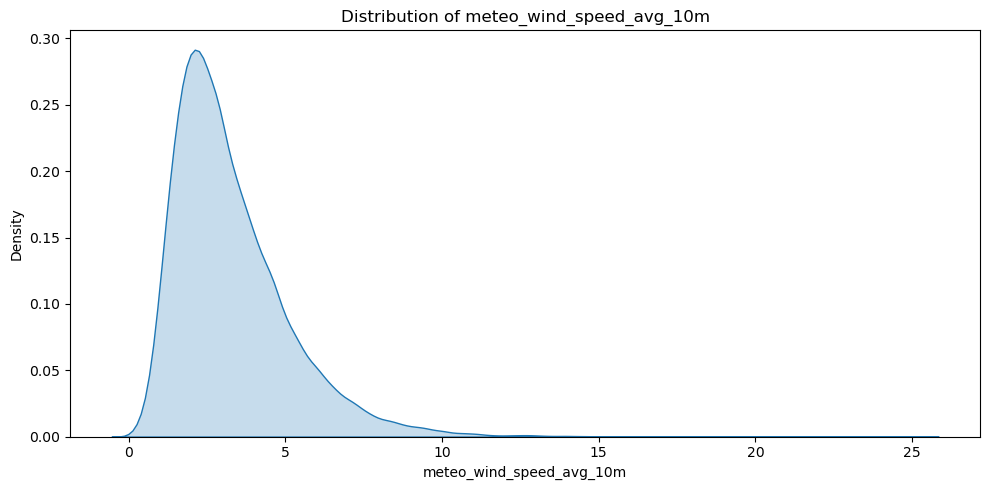

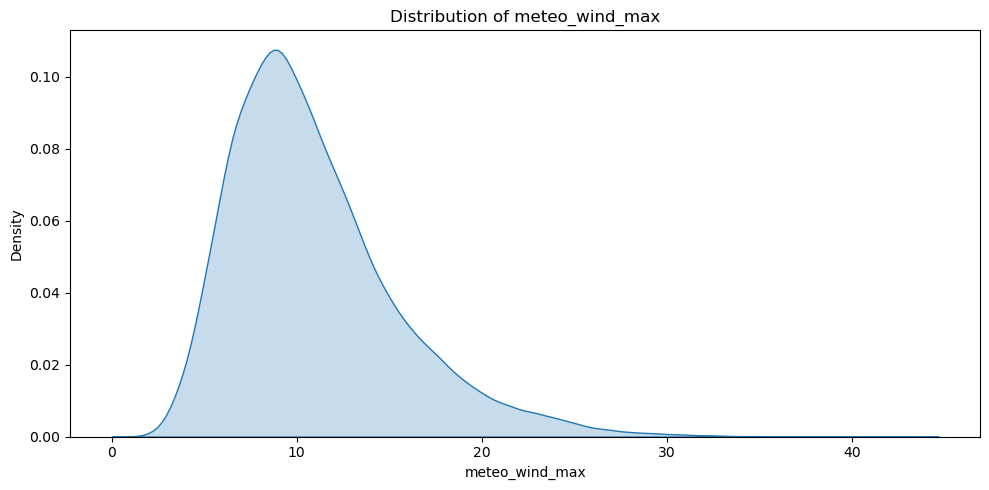

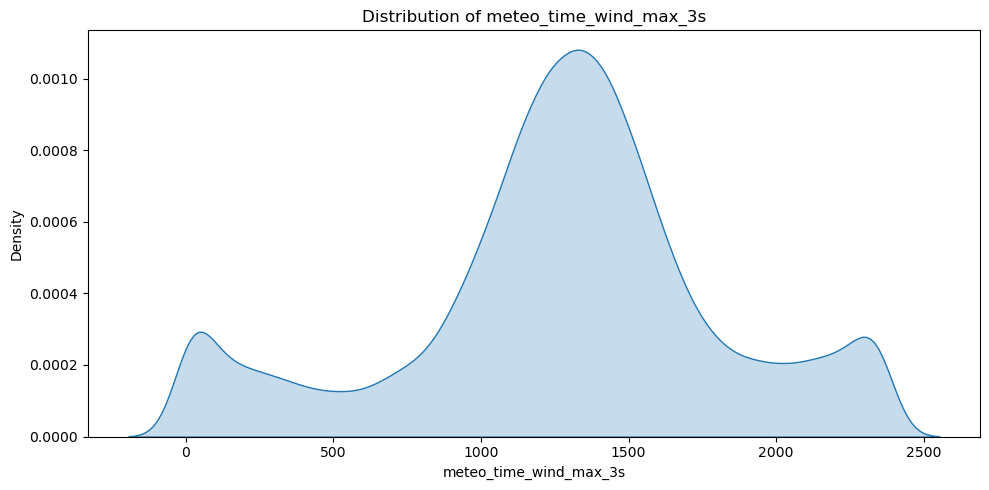

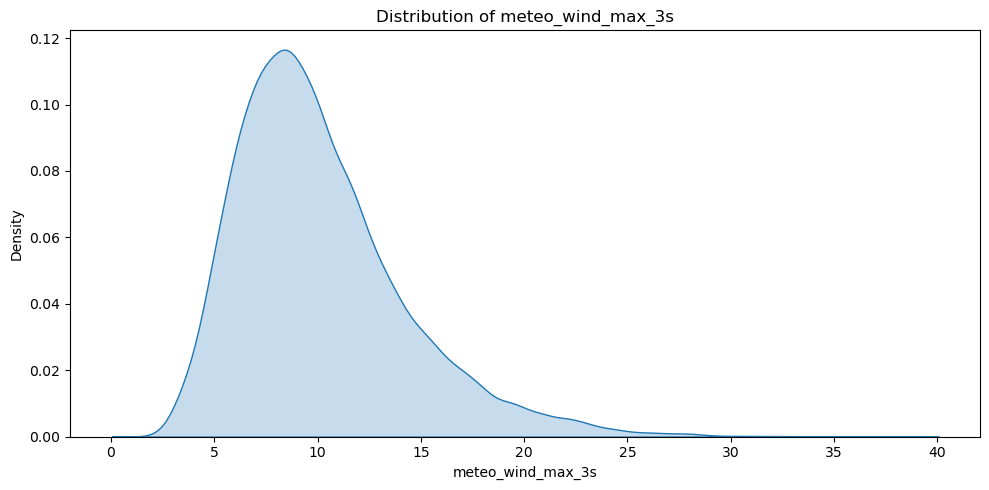

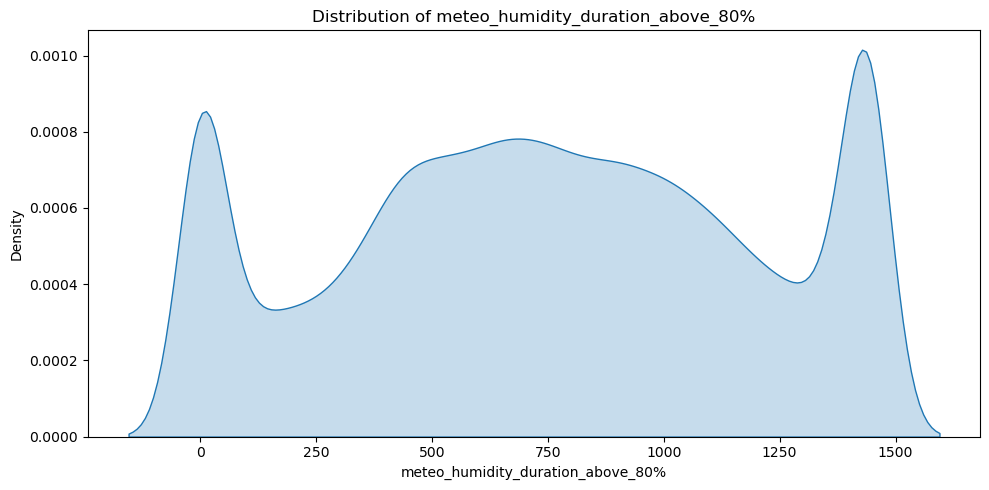

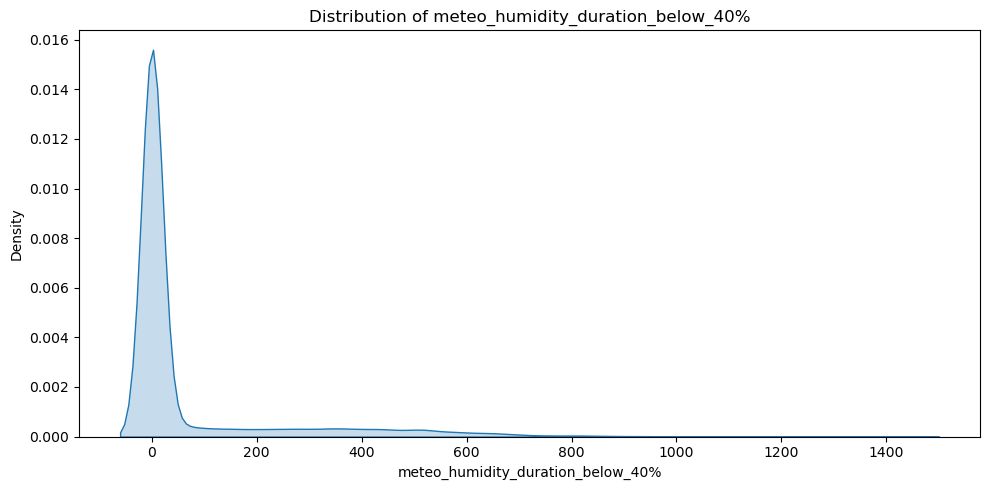

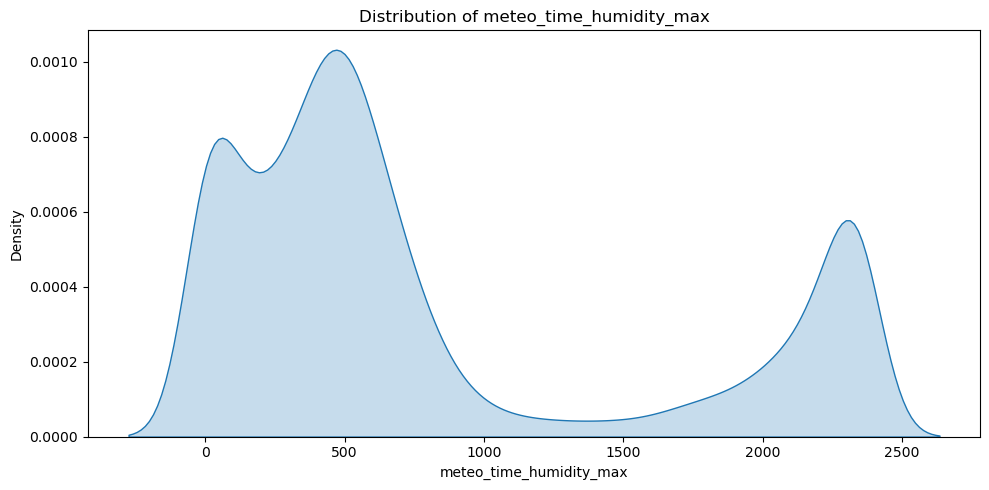

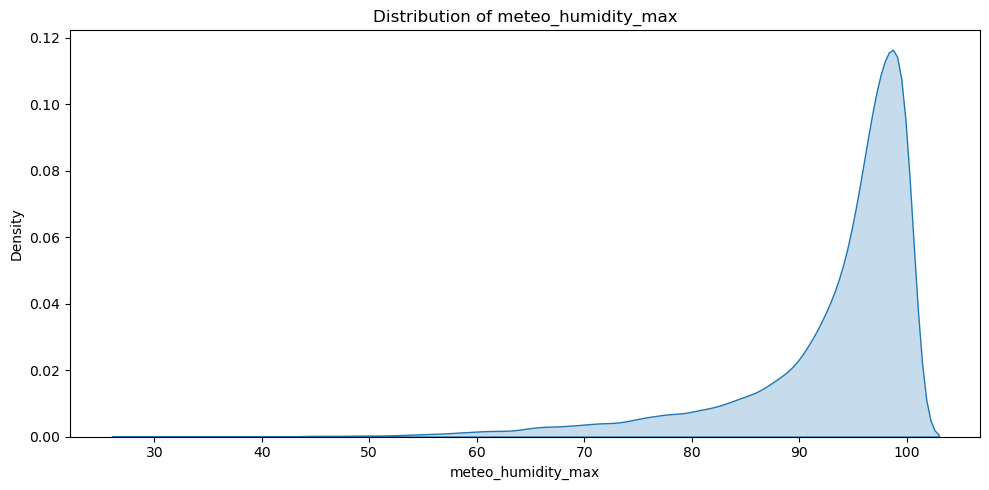

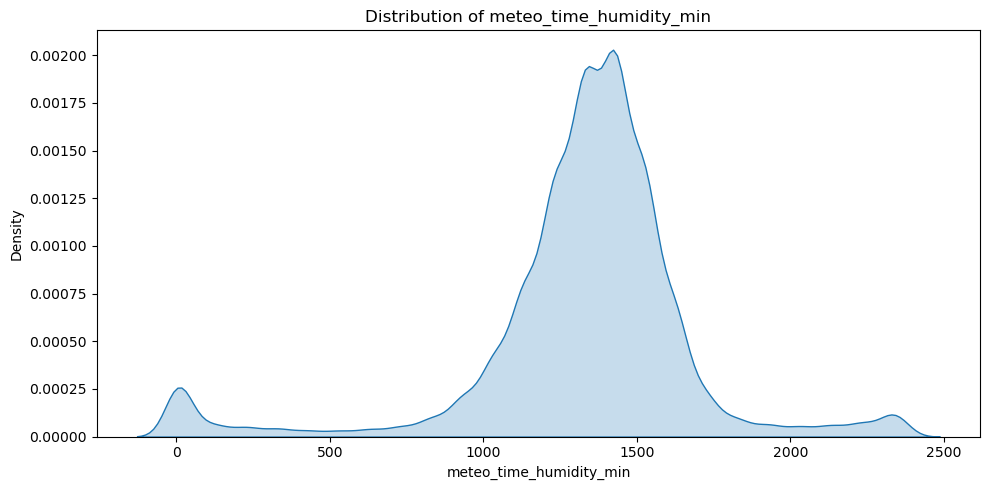

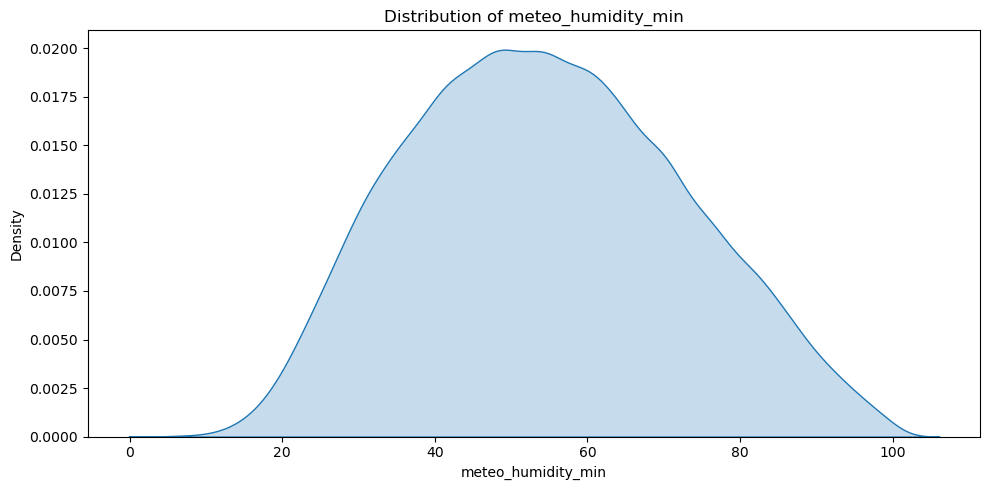

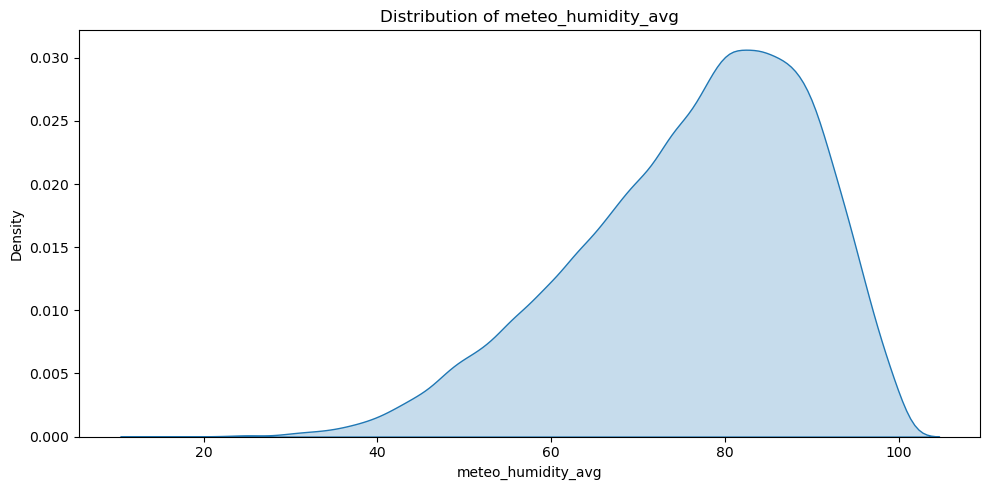

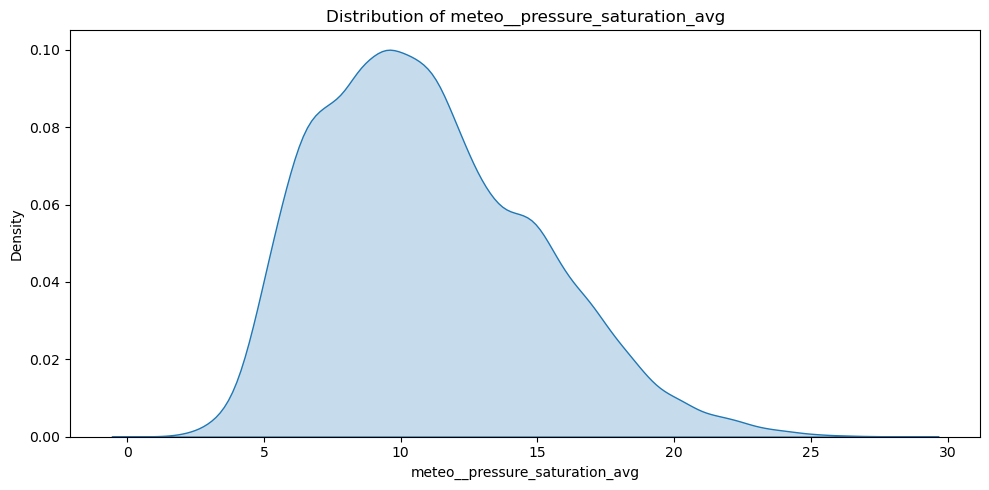

In [229]:
for column in medium_NaN_columns:
    if column in meteo_variables.columns:
        plot_kde_for_column(meteo_variables, column)
    else:
        print(f"Column {column} not found in filtered_df")

In [230]:
# columns to work with are those that have between 20 000 and 60 000 NaN
medium_NaN_columns_remove = [
    "meteo_wind_direction_max_avg",
    "meteo_time_wind_avg",
    "meteo_wind_direction_max_inst",
    "meteo_time_wind_max",
    "meteo_time_wind_max_3s",
    "meteo_humidity_duration_above_80%",
    "meteo_time_humidity_max"
]

# Create the new DataFrame excluding the specified columns
meteo_variables = meteo_variables.drop(columns=medium_NaN_columns_remove, errors='ignore')

In [231]:
medium_NaN_columns_keep = [
    "meteo_wind_avg",
    "meteo_wind_speed_avg_10m",
    "meteo_wind_max",
    "meteo_wind_max_3s",
    "meteo_humidity_duration_below_40%",
    "meteo_humidity_max",
    "meteo_time_humidity_min",
    "meteo_humidity_min",
    "meteo_humidity_avg",
    "meteo__pressure_saturation_avg"   
]

# if we replace their NaN values with median
meteo_variables_replace_all_NaN = meteo_variables
# replacing columns between 1 and 2 million NaN with median 
for column in medium_NaN_columns_keep:
    if column in meteo_variables_replace_all_NaN.columns:
        meteo_variables_replace_all_NaN[column].fillna(meteo_variables_replace_all_NaN[column].median(), inplace=True)

# dropping any column with more than 1 million NaN
meteo_variables = meteo_variables.drop(columns=medium_NaN_columns_keep, errors='ignore')

### 1.3. Verifying missing values

In [232]:
# Calculate missing values for numerical columns
missing_values = meteo_variables.isna().sum(axis=0)

# Filter to show only columns with missing values
columns_with_missing = missing_values[missing_values > 0]

# Display the columns with missing values
print(columns_with_missing)

Series([], dtype: int64)


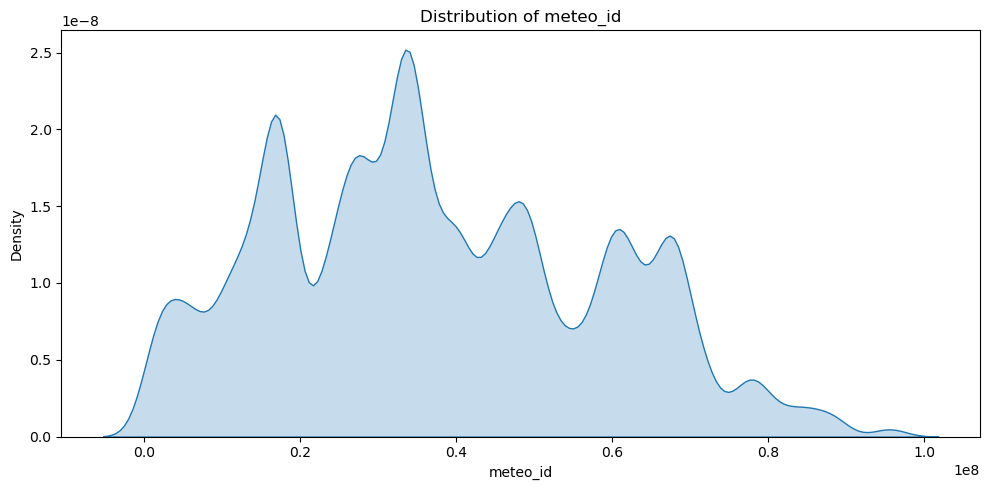

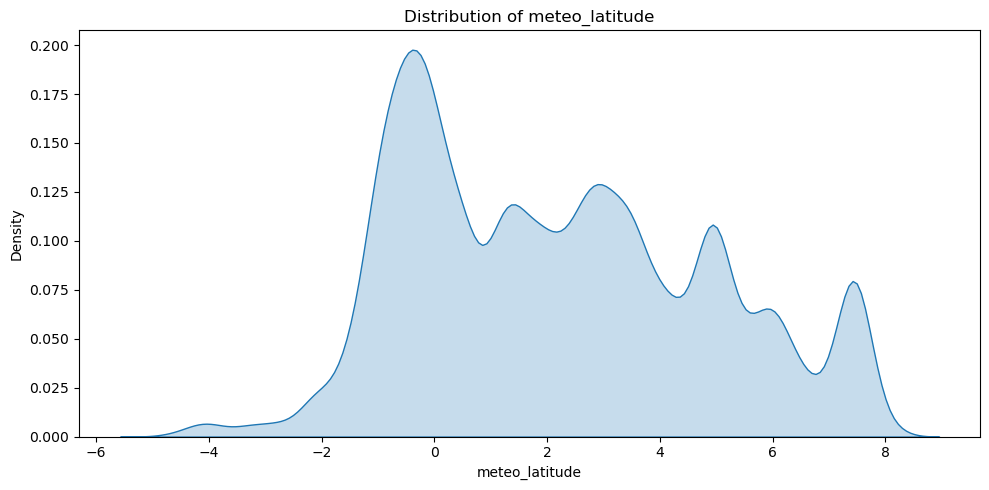

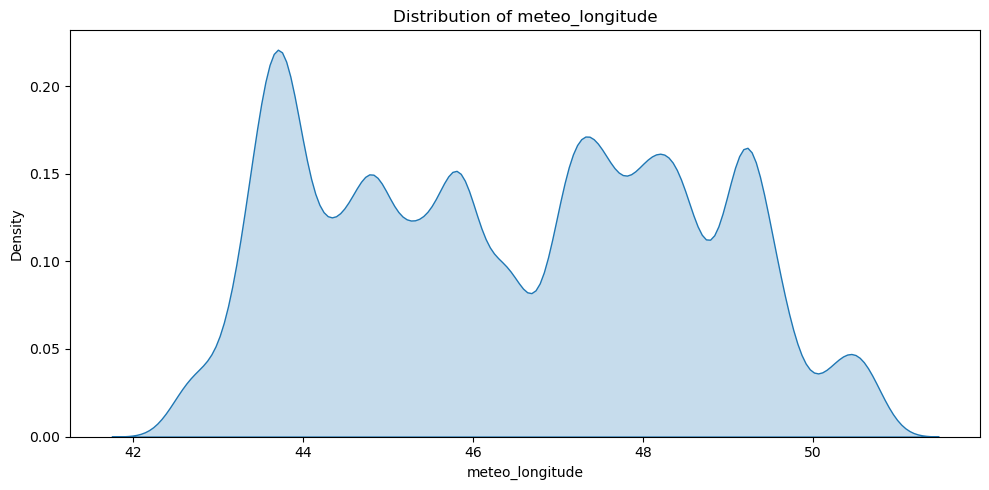

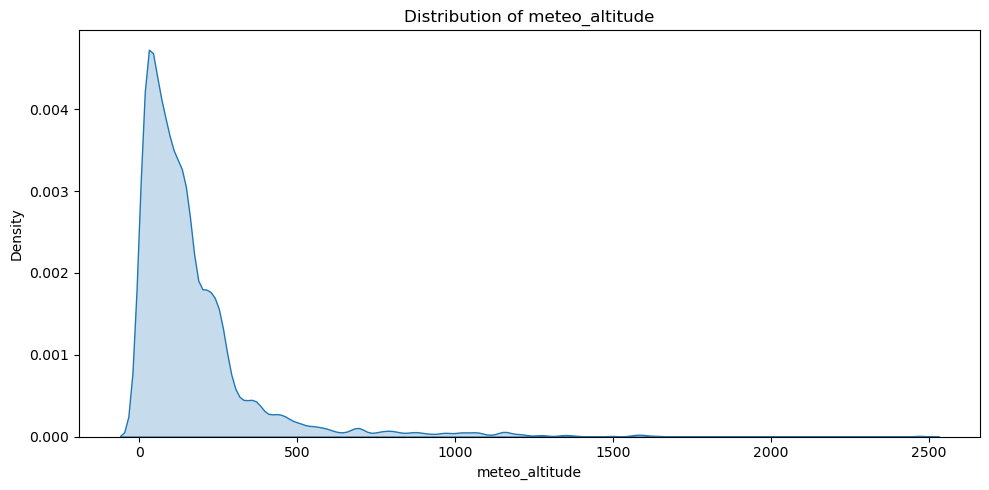

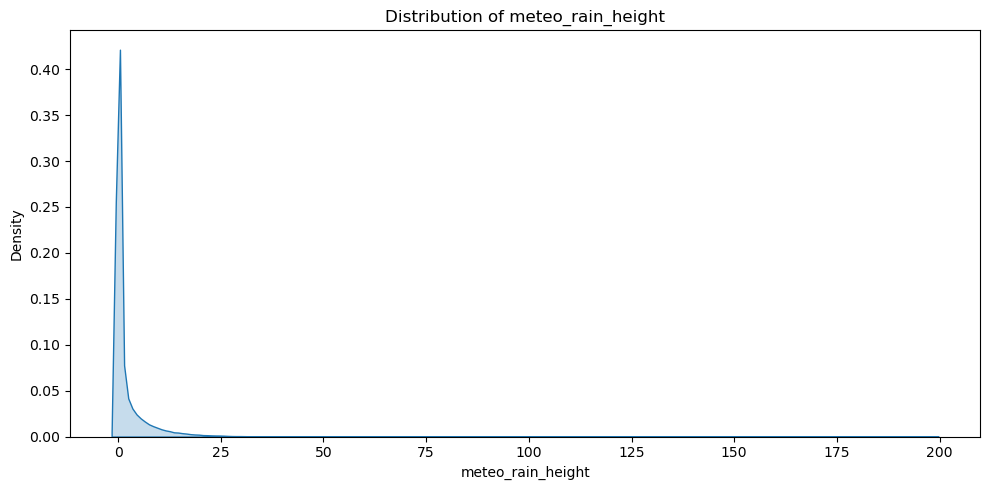

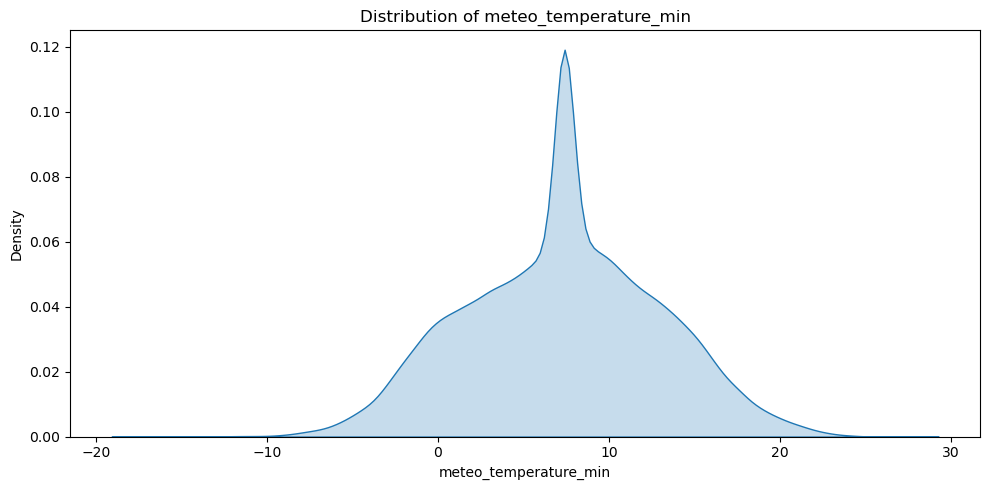

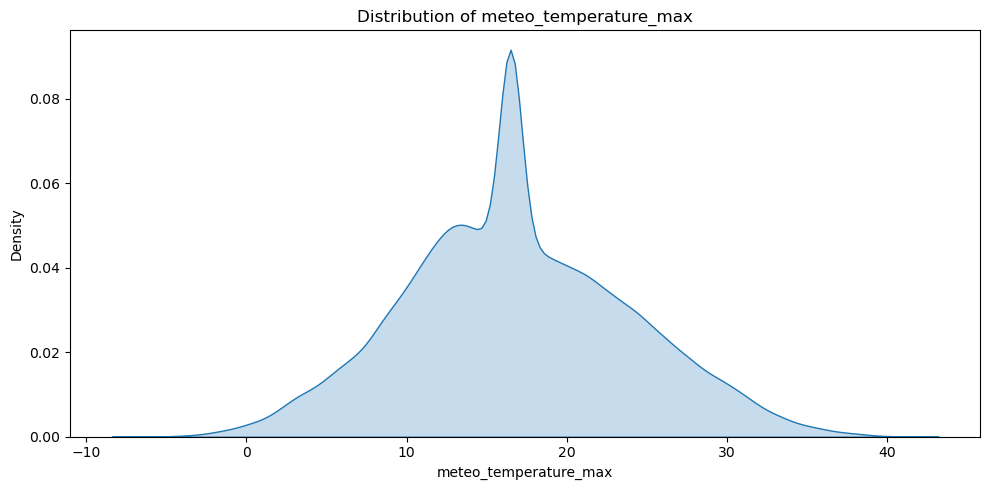

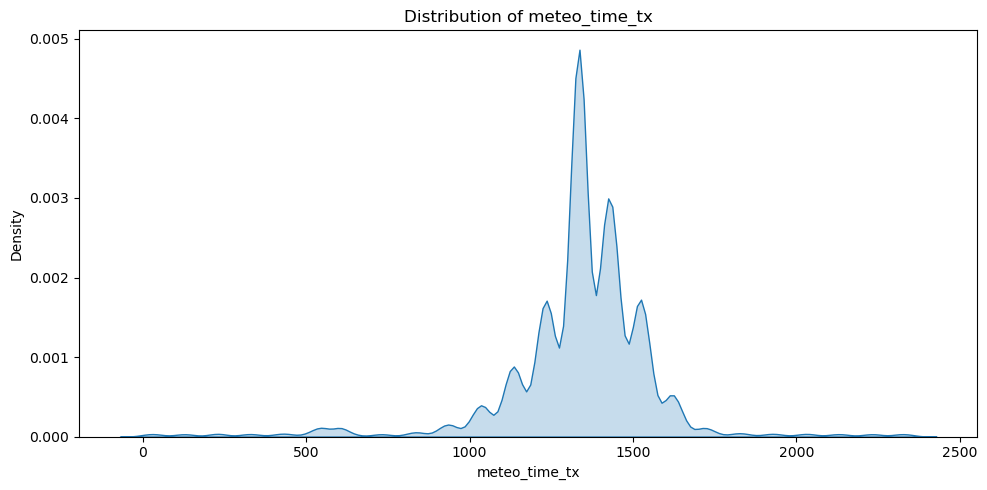

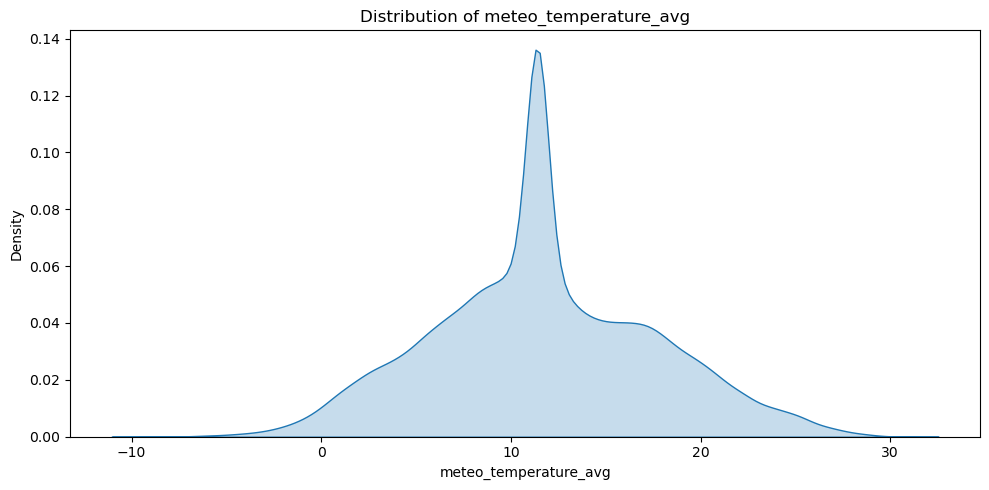

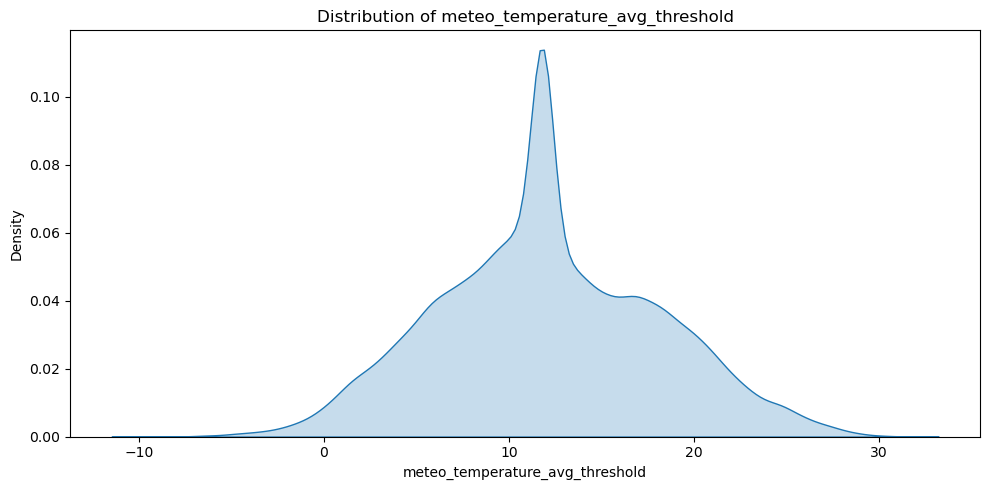

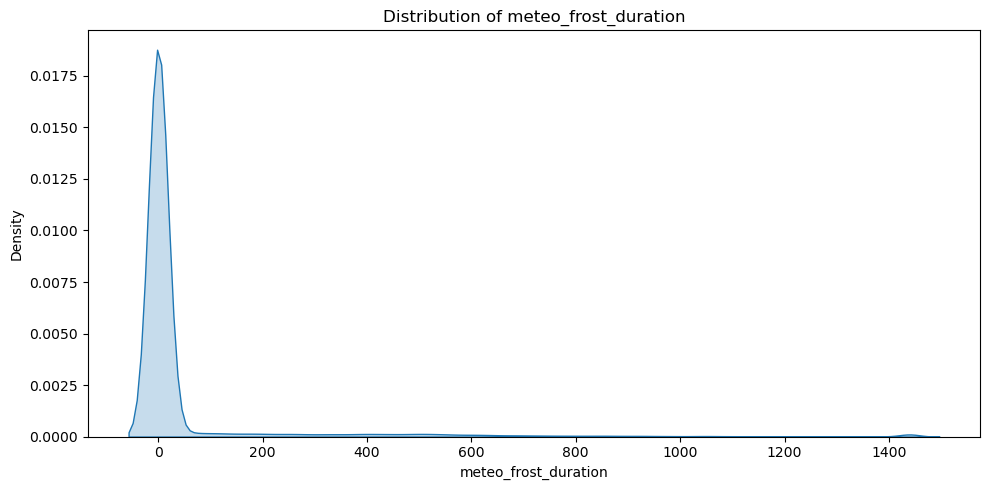

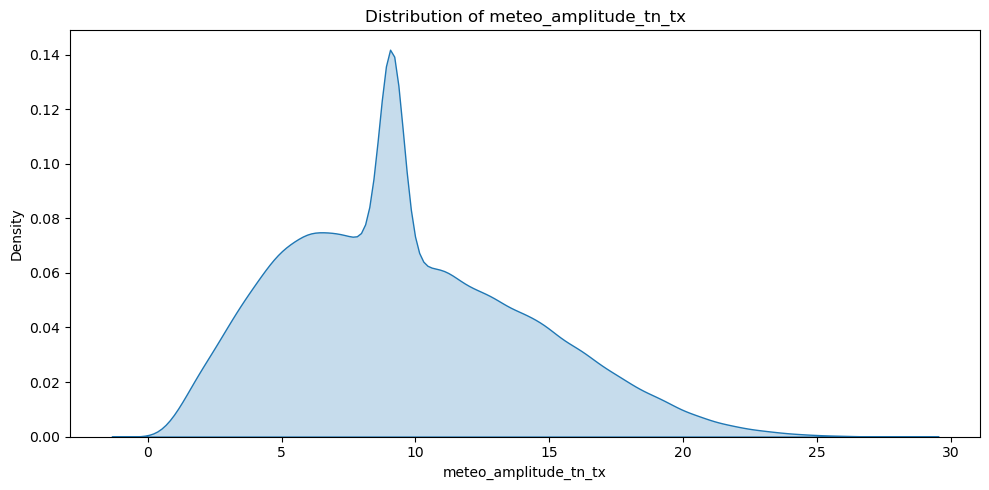

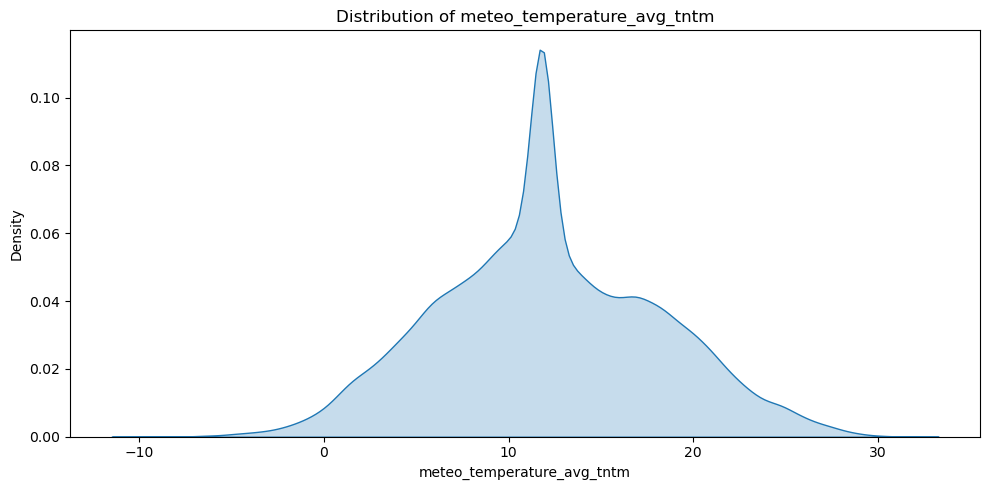

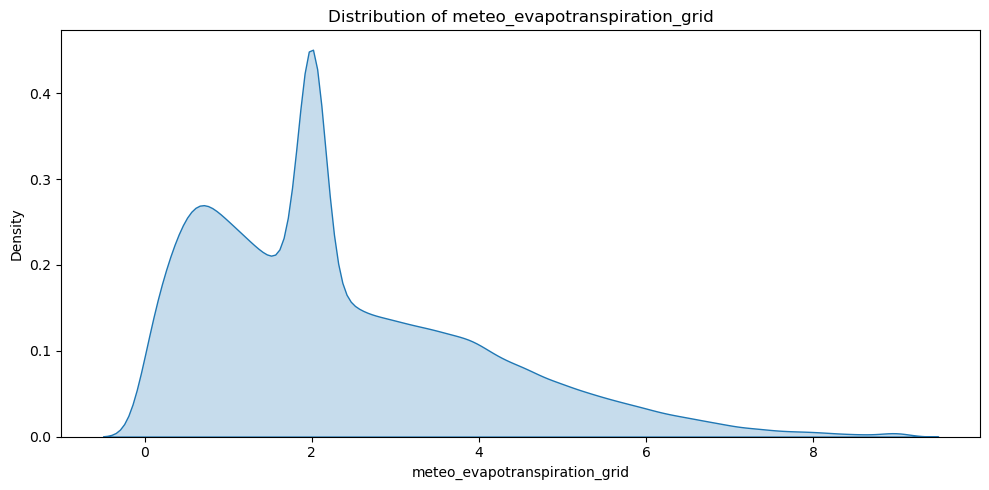

In [233]:
numerical_meteo = meteo_variables.select_dtypes(include=['float64', 'int64']).columns

# Plot KDE for all numerical columns in filtered_df
for column in meteo_variables[numerical_meteo].columns:
    plot_kde_for_column(meteo_variables, column)

### 1.4. Correlation between values

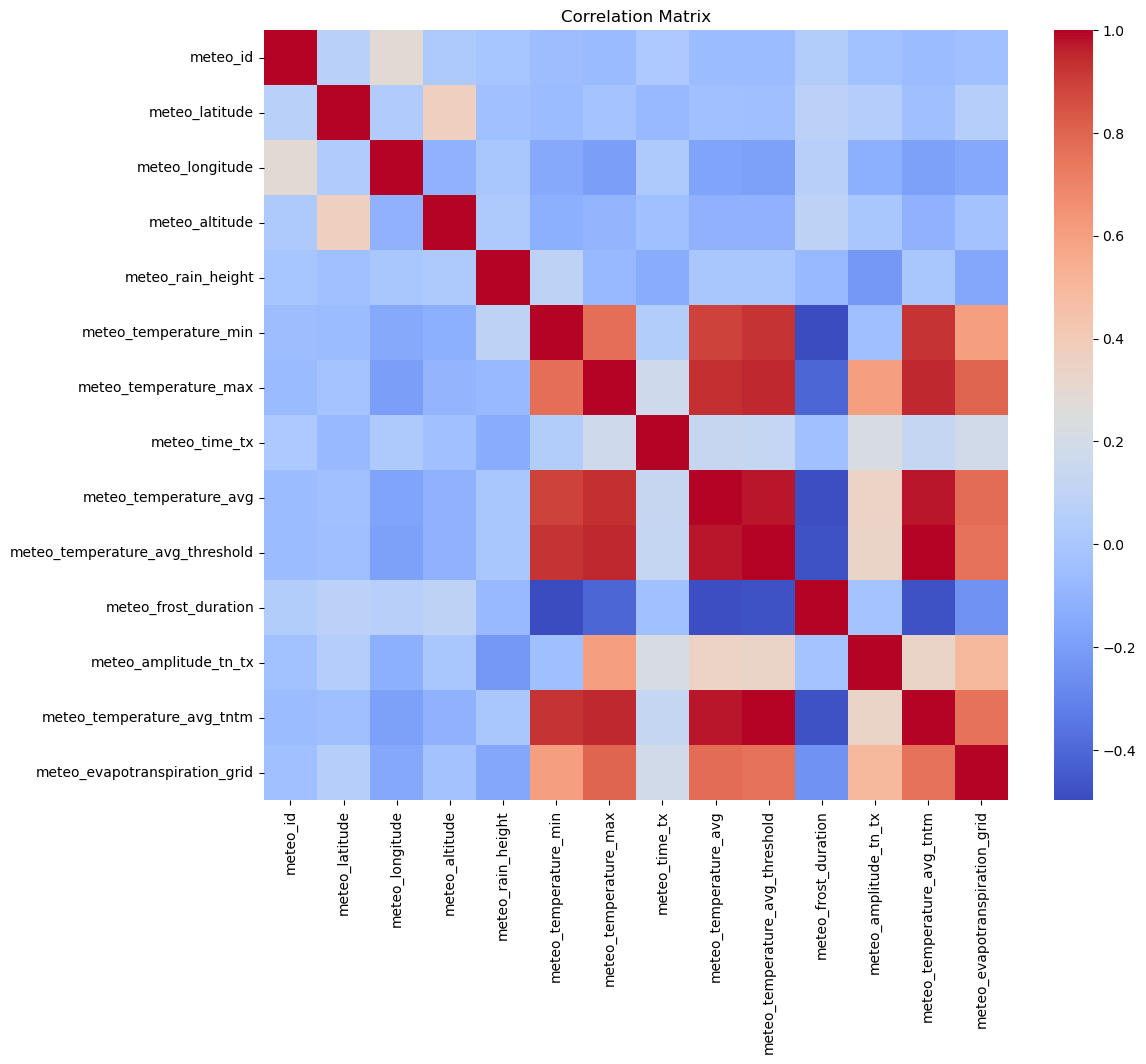

In [234]:
correlation_matrix = plot_correlation_matrix(meteo_variables, numerical_meteo)

In [235]:
print(get_sorted_correlation_pairs(correlation_matrix))

                          Feature 1                        Feature 2  \
83  meteo_temperature_avg_threshold       meteo_temperature_avg_tntm   
76            meteo_temperature_avg  meteo_temperature_avg_threshold   
79            meteo_temperature_avg       meteo_temperature_avg_tntm   
65            meteo_temperature_max  meteo_temperature_avg_threshold   
68            meteo_temperature_max       meteo_temperature_avg_tntm   
..                              ...                              ...   
43                   meteo_altitude            meteo_amplitude_tn_tx   
50                meteo_rain_height  meteo_temperature_avg_threshold   
53                meteo_rain_height       meteo_temperature_avg_tntm   
49                meteo_rain_height            meteo_temperature_avg   
26                  meteo_longitude                meteo_rain_height   

    Correlation Score  Absolute Correlation  
83           0.999991              0.999991  
76           0.972225              0.972225

The column "meteo_temperature_avg" is highly correlated with "meteo_temperature_max", "meteo_temperature_min", "meteo_temperature_avg_tntm", and "meteo_temperature_avg_threashold". We decided to keep this one rather than the others as it seems to hold more information, since it is more correlated to the others than the others to each other.

In [236]:
columns_to_drop = [
    "meteo_temperature_max",
    "meteo_temperature_min",
    "meteo_temperature_avg_tntm",
    "meteo_temperature_avg_threshold"
]

# Drop the specified columns
meteo_variables = meteo_variables.drop(columns=columns_to_drop, errors='ignore')
numerical_meteo = meteo_variables.select_dtypes(include=['float64', 'int64']).columns

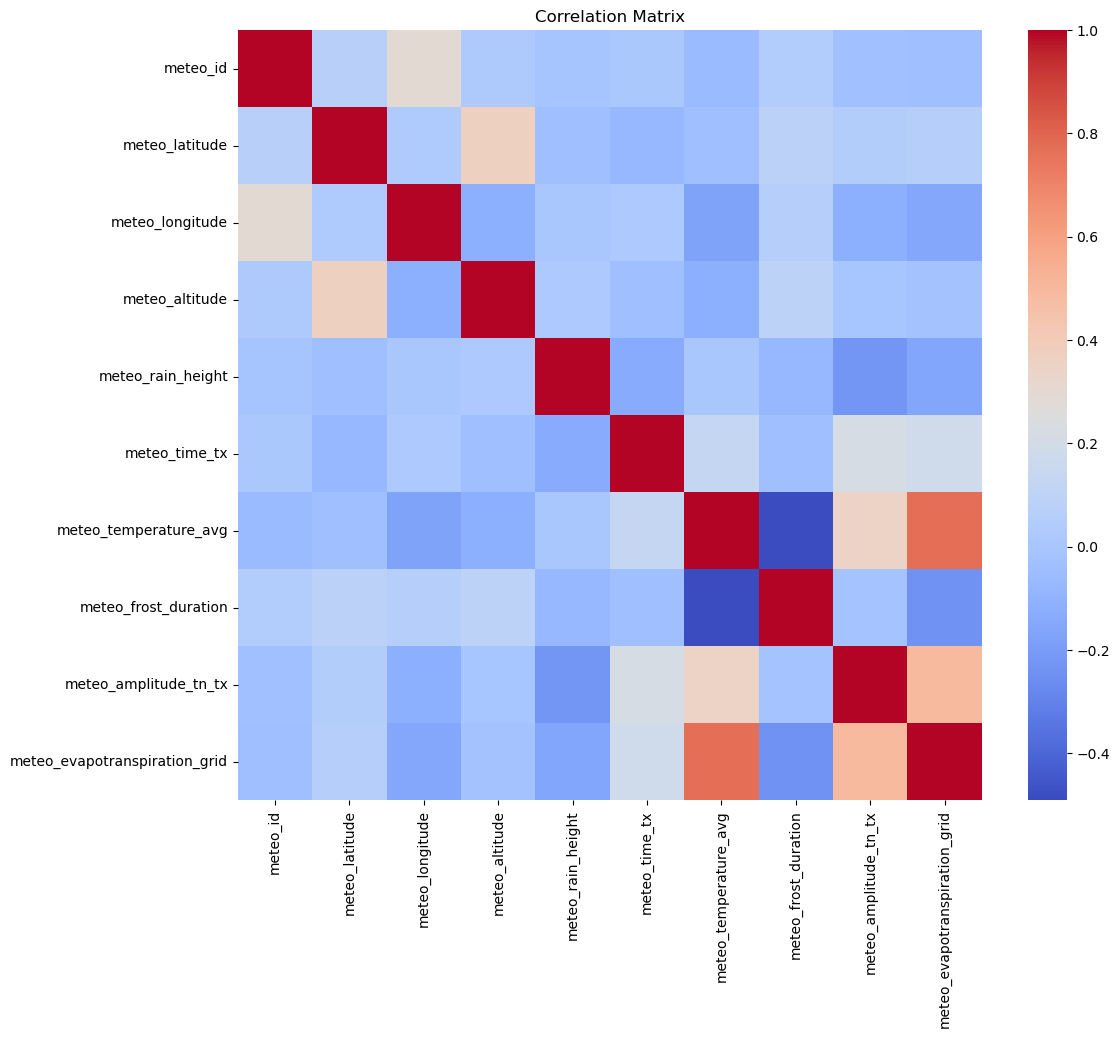

In [237]:
correlation_matrix = plot_correlation_matrix(meteo_variables, numerical_meteo)

## 2. Categorical values

In [238]:
# displaying which categorical columns have missing values
meteo_variables[categorical_meteo].isna().sum(axis=0)

meteo_name    0
meteo_date    0
dtype: int64

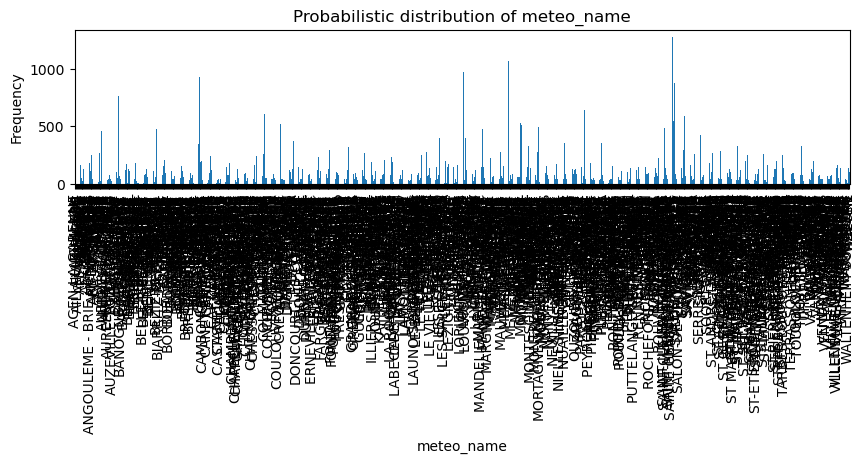

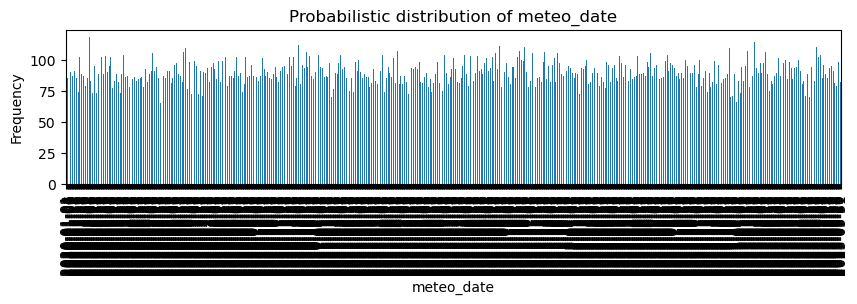

In [239]:
for column in categorical_meteo:
    # choosing a size for each bar plot
    plt.figure(figsize=(10,2))
    
    # creating bar plots for each feature
    meteo_variables[column].value_counts().sort_index().plot(kind='bar')
    
    # choosing appropriate names for titles and x and y axises
    plt.title(f'Probabilistic distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    # displaying bar plots
    plt.show()